In [1]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import keras as ks
import pandas as pd
import torch
import seaborn as sns

To start with this project, I first use mnist dataset for test and exploration in following 3 steps:

1. Load and Explore the Dataset

2. feature engineering

3. Unsupervised learning

Since this is a alrealdy prepared dataset, I don't include data preparation as 4th steps in pipeline.

## STEP 1: Load and Explore the Dataset

target:  3


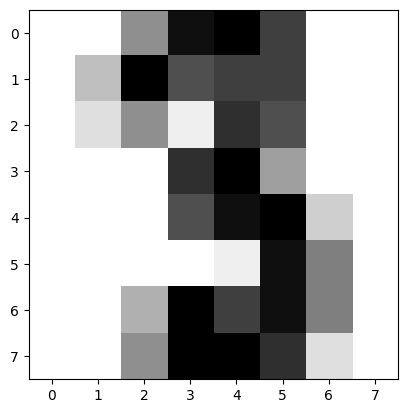

target:  3


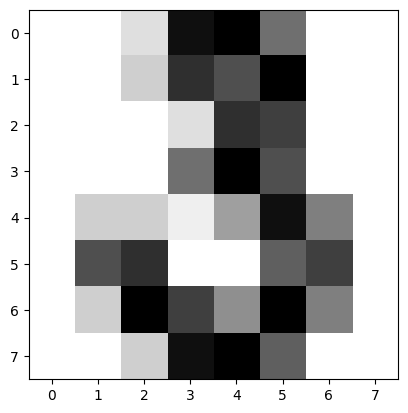

target:  3


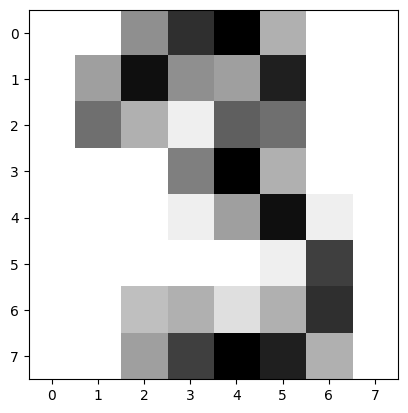

In [2]:
import sklearn.datasets as datasets

digits = datasets.load_digits()


for x in range(3):
    random_index = np.random.choice(len(digits.data))
    print("target: ", digits.target[random_index])
    plt.imshow(digits.images[random_index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [3]:
print(digits.data.shape) 
print(digits.target.shape)
y = digits.target
print(np.unique(y))

(1797, 64)
(1797,)
[0 1 2 3 4 5 6 7 8 9]


Through simple exploration of dataset, we can find that there are 1797 grey scale images and each label a number, in total there is 10 class.

In [4]:
count_df = pd.DataFrame(digits.target, columns=["class"])
for x in np.unique(y):
    print(count_df[count_df["class"]==x].value_counts())

class
0        178
Name: count, dtype: int64
class
1        182
Name: count, dtype: int64
class
2        177
Name: count, dtype: int64
class
3        183
Name: count, dtype: int64
class
4        181
Name: count, dtype: int64
class
5        182
Name: count, dtype: int64
class
6        181
Name: count, dtype: int64
class
7        179
Name: count, dtype: int64
class
8        174
Name: count, dtype: int64
class
9        180
Name: count, dtype: int64


## STEP 2: feature engineering

### 1. Explore normalization

In [5]:
# use min max normalize to rearrange the image in [0, 1] scale

x = digits.data
x_norm = x/255.0
print(x[0])
print(x_norm[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
[0.         0.         0.01960784 0.05098039 0.03529412 0.00392157
 0.         0.         0.         0.         0.05098039 0.05882353
 0.03921569 0.05882353 0.01960784 0.         0.         0.01176471
 0.05882353 0.00784314 0.         0.04313725 0.03137255 0.
 0.         0.01568627 0.04705882 0.         0.         0.03137255
 0.03137255 0.         0.         0.01960784 0.03137255 0.
 0.         0.03529412 0.03137255 0.         0.         0.01568627
 0.04313725 0.         0.00392157 0.04705882 0.02745098 0.
 0.         0.00784314 0.05490196 0.01960784 0.03921569 0.04705882
 0.         0.         0.         0.         0.02352941 0.05098039
 0.03921569 0.         0.         0.        ]


### 2. Resizing
skip

### 3. Histogram Equalization

target:  8


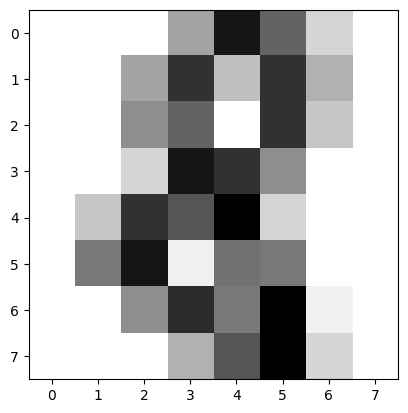

target:  0


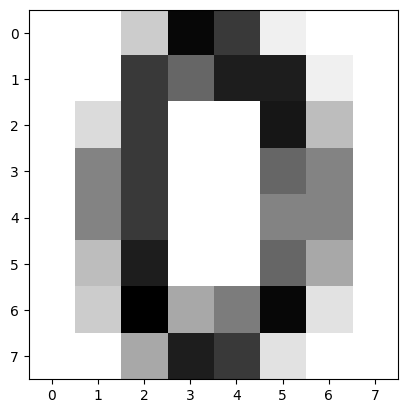

target:  5


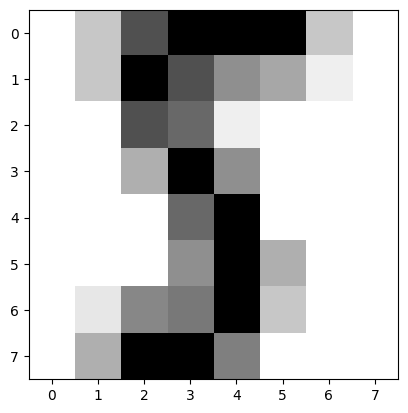

In [6]:
import cv2

for x in range(3):
    random_index = np.random.choice(len(digits.data))
    print("target: ", digits.target[random_index])
    img = cv2.equalizeHist(np.uint8(digits.images[random_index]))
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

Histogram equalization improve contrast to image by redistribute the pixel intensity evenly. 

### 4. Edge detection

target:  0
torch.Size([8, 8])


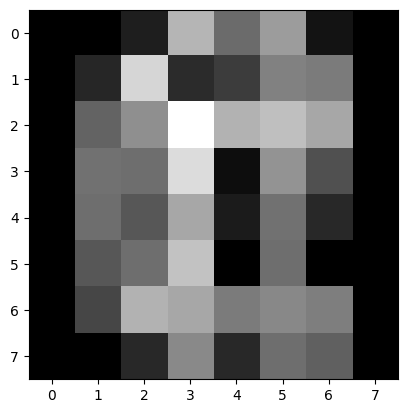

target:  2
torch.Size([8, 8])


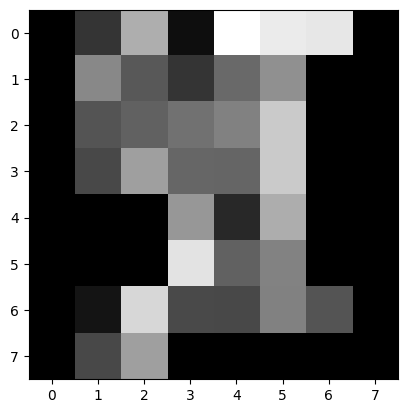

target:  5
torch.Size([8, 8])


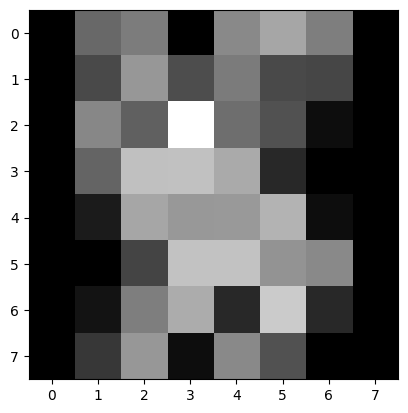

In [7]:
def gradient_edge_detection(img):
    print(img.shape)
    H, W = img.shape
    g_x = torch.zeros((H, W))
    g_y = torch.zeros((H, W))
    
    for i in range(H):
        for j in range(W):
            if j < W-1:
                g_x[i, j] = img[i, j] - img[i, j-1]
            if i < H-1:
                g_y[i, j] = img[i, j] - img[i-1, j]
    gradient_magnitude = torch.sqrt(g_x**2 + g_y**2)
    plt.imshow(gradient_magnitude.numpy(), cmap="gray")##tensor_magnitude
    plt.show()
for x in range(3):
    random_index = np.random.choice(len(digits.data))
    print("target: ", digits.target[random_index])
    img = torch.tensor(digits.data[random_index], dtype=torch.float32).reshape(8,8)
    gradient_edge_detection(img)

## STEP 3: Unsupervised Learning

### Clustering algorithms: k-means, hierarchical clustering, DBSCAN

In [8]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.metrics import silhouette_score

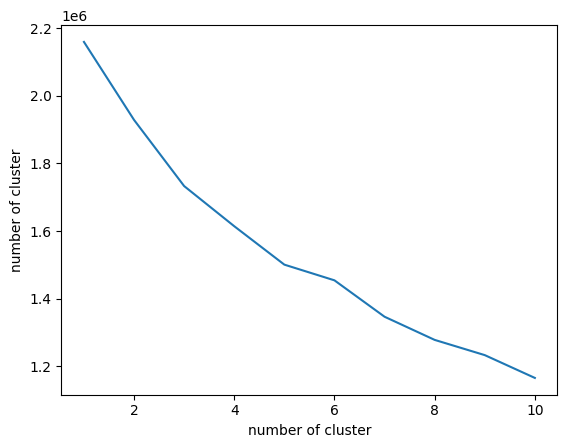

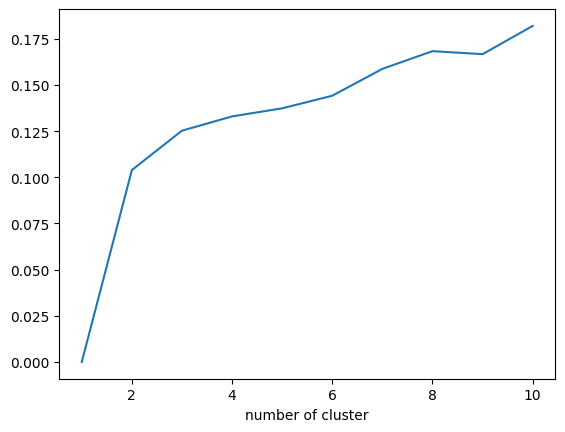

In [9]:
#k-means (base on pixel centriod)
ls_score = []
ls = []
x = digits.data
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++')
    cb = kmeans.fit_predict(x)
    #kmeans.fit(df_y)
    if len(set(cb)) > 1: 
        score = silhouette_score(x, cb)
        ls_score.append(score)
    else:ls_score.append(0)
    ls.append(kmeans.inertia_)

plt.plot(range(1,11), ls)
plt.xlabel("number of cluster")
plt.ylabel("number of cluster")
plt.show()
plt.plot(range(1,11), ls_score)
plt.xlabel("number of cluster")
plt.show()


target:  0
k-means predicted target:  2


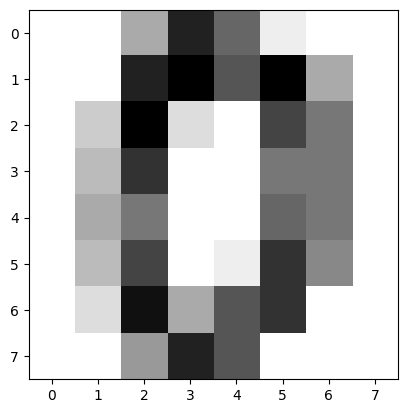

target:  1
k-means predicted target:  4


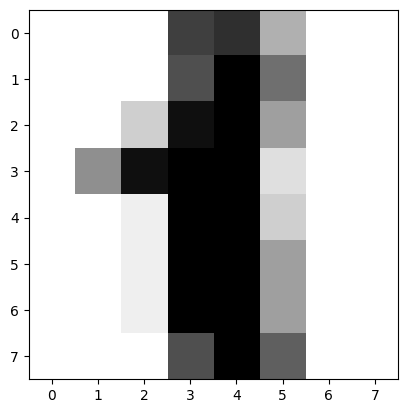

target:  2
k-means predicted target:  4


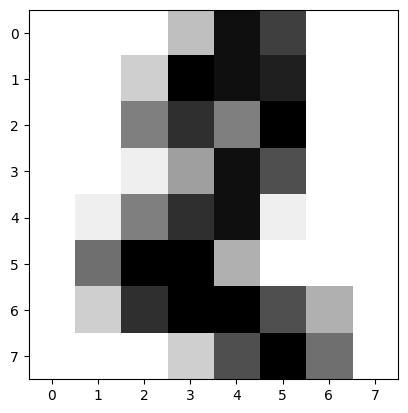

target:  3
k-means predicted target:  0


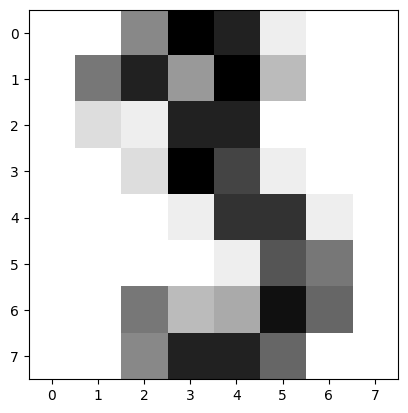

target:  4
k-means predicted target:  5


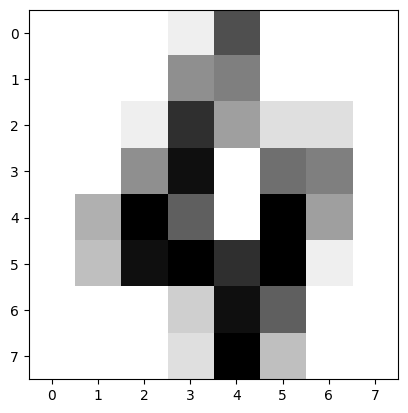

target:  5
k-means predicted target:  3


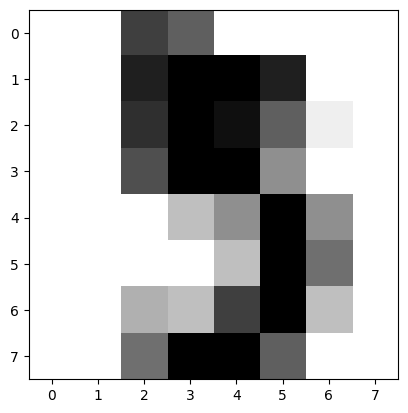

target:  6
k-means predicted target:  6


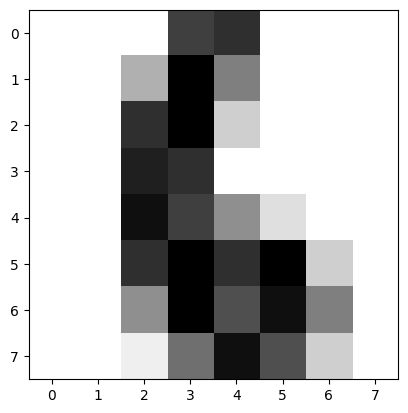

target:  7
k-means predicted target:  1


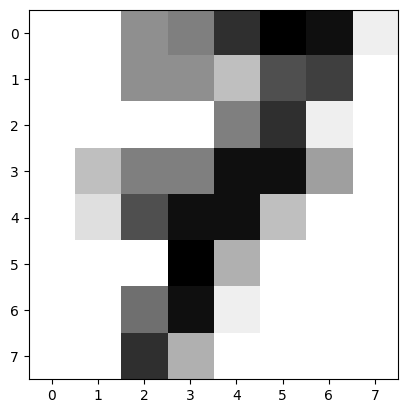

target:  8
k-means predicted target:  4


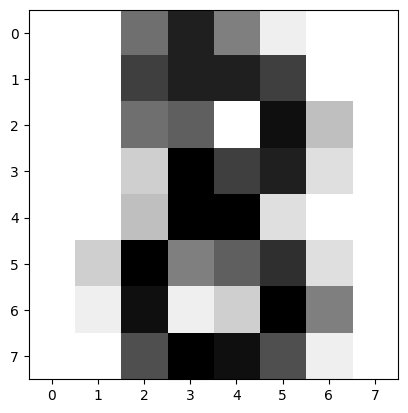

target:  9
k-means predicted target:  3


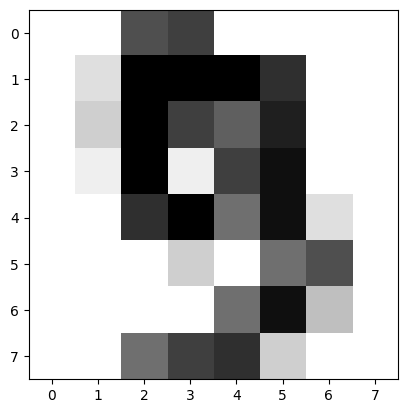

In [10]:
#k-mean optimal
#Through inertia and s-score, we can see cluster of 7 is best (although we know that this is 10 class data)
kmeans=KMeans(n_clusters=7, init='k-means++')
cb = kmeans.fit_predict(x)
random_index = -1
for k in range(10):
    random_index += 1   
    print("target: ", digits.target[random_index])
    print("k-means predicted target: ", cb[random_index])
    plt.imshow(digits.images[random_index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [11]:
#DBSCAN
ls = []
for i in [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]:
    for j in range(1,11):
        dbsan_c = DBSCAN(eps=i, min_samples=j, metric='euclidean')
        dset = dbsan_c.fit(x).labels_
        num_clusters = len(set(dset)) - (1 if -1 in dset else 0)
        if len(x) - 1 > num_clusters > 1:  
            score = silhouette_score(x, dset)
            ls.append(score)
            print("i: ",i,", j: ",j, ", score: ",score)
        else:
            ls.append(0)

i:  10 , j:  1 , score:  0.004786035820310436
i:  10 , j:  2 , score:  -0.303334535954086
i:  10 , j:  3 , score:  -0.04707440637386726
i:  15 , j:  1 , score:  0.011646553055860877
i:  15 , j:  2 , score:  -0.23896279879294888
i:  15 , j:  3 , score:  -0.2604771732954627
i:  15 , j:  4 , score:  -0.2512078150324699
i:  15 , j:  5 , score:  -0.22618049233516496
i:  15 , j:  6 , score:  -0.18954289757942683
i:  15 , j:  7 , score:  -0.15986125097925344
i:  15 , j:  8 , score:  -0.13224682471717542
i:  15 , j:  9 , score:  -0.13992959207061084
i:  15 , j:  10 , score:  -0.13304093170613518
i:  20 , j:  1 , score:  -0.15589066025548037
i:  20 , j:  2 , score:  -0.035874921218435864
i:  20 , j:  3 , score:  0.04137951869539824
i:  20 , j:  4 , score:  0.09115647250822748
i:  20 , j:  5 , score:  0.06949380671387066
i:  20 , j:  6 , score:  0.052973197535876
i:  20 , j:  7 , score:  0.0581956914231094
i:  20 , j:  8 , score:  0.050067854364723254
i:  20 , j:  9 , score:  0.04253338156138962

target:  0
k-means predicted target:  0


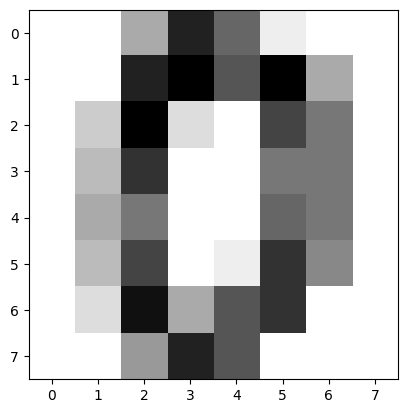

target:  1
k-means predicted target:  0


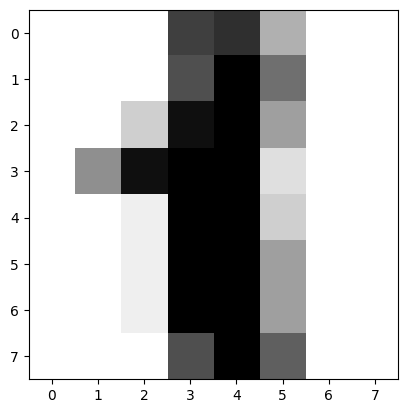

target:  2
k-means predicted target:  0


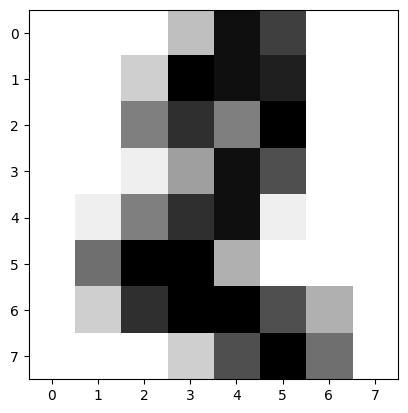

target:  3
k-means predicted target:  0


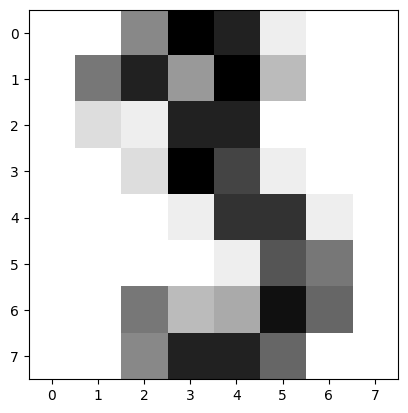

target:  4
k-means predicted target:  0


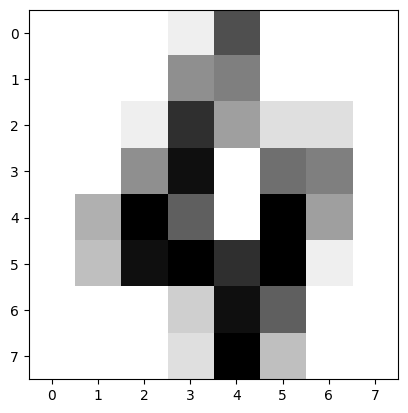

target:  5
k-means predicted target:  0


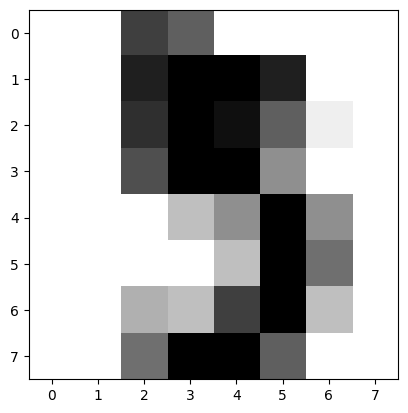

target:  6
k-means predicted target:  0


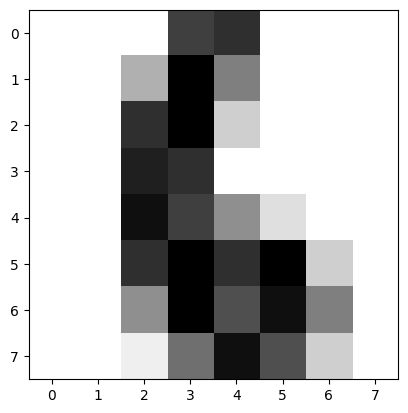

target:  7
k-means predicted target:  0


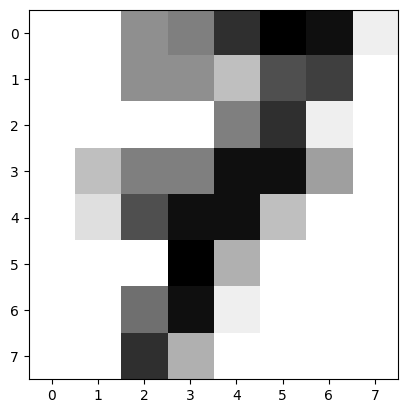

target:  8
k-means predicted target:  0


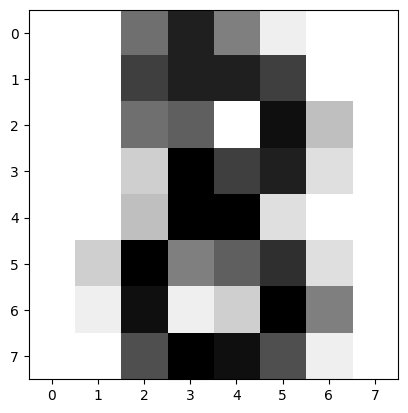

target:  9
k-means predicted target:  0


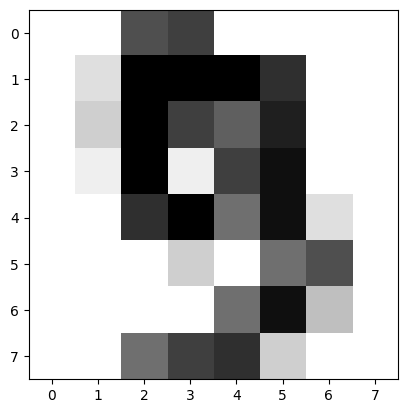

In [12]:
#optim dbscan
#eps= 20, min sample = 4
dbsan_c = DBSCAN(eps=i, min_samples=j, metric='euclidean')
cb = dbsan_c.fit(x).labels_
random_index = -1
for k in range(10):
    random_index += 1   
    print("target: ", digits.target[random_index])
    print("k-means predicted target: ", cb[random_index])
    plt.imshow(digits.images[random_index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

In [16]:
#hierachical clustering
x = digits.data
best_score = 0
for k in range(1,20):
    model = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = model.fit_predict(x)

    if len(set(labels)) > 1: 

        score = silhouette_score(x, labels)

        if score > best_score:
            best_score = score
            print(k)

2
5
6
7
8
9


target:  0
k-means predicted target:  7


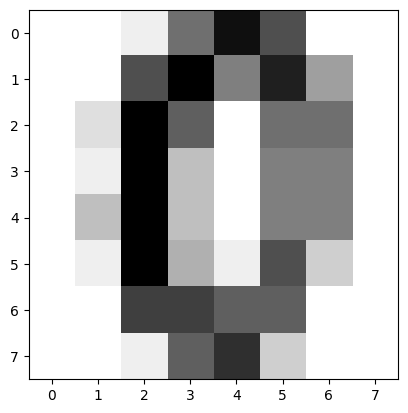

target:  1
k-means predicted target:  8


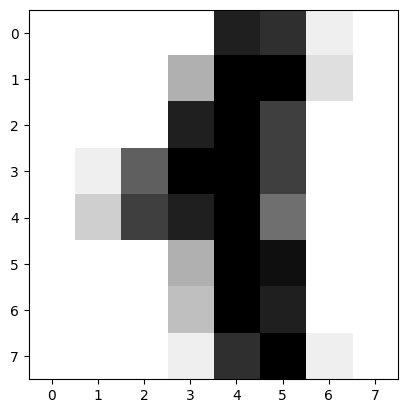

target:  2
k-means predicted target:  2


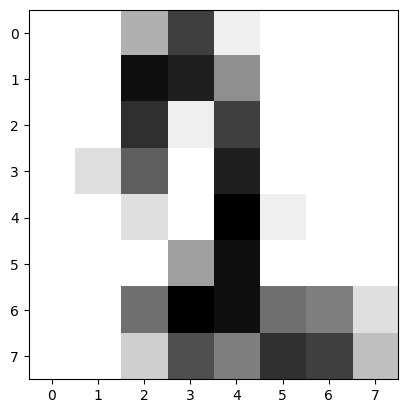

target:  3
k-means predicted target:  4


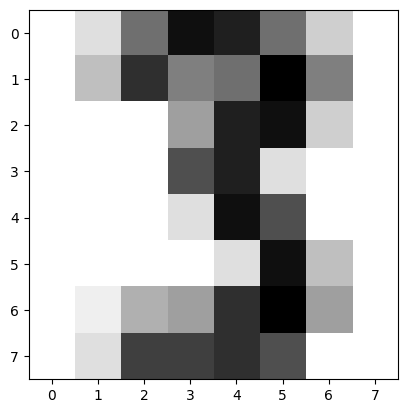

target:  4
k-means predicted target:  5


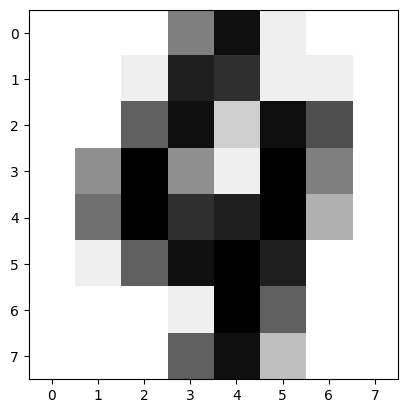

target:  5
k-means predicted target:  1


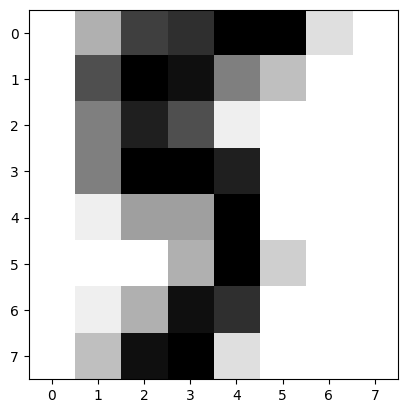

target:  6
k-means predicted target:  6


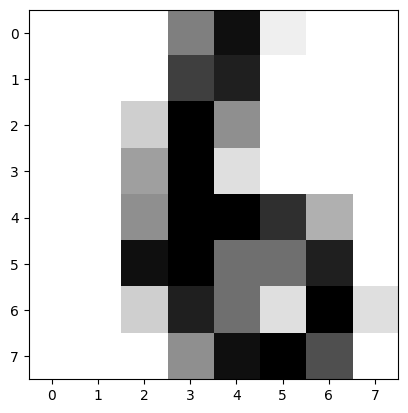

target:  7
k-means predicted target:  3


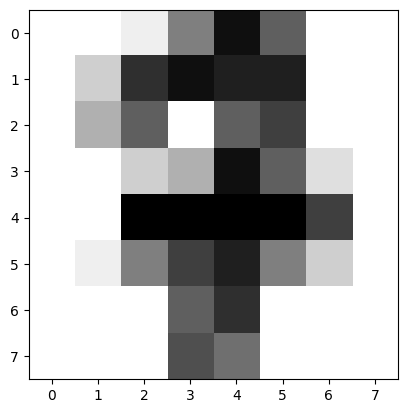

target:  8
k-means predicted target:  0


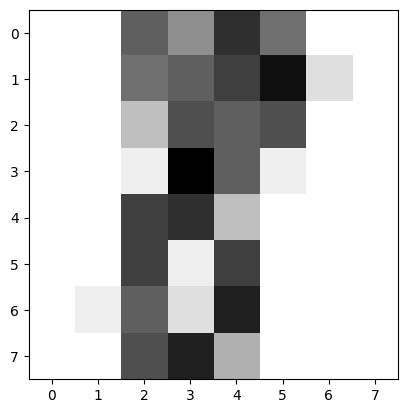

target:  9
k-means predicted target:  4


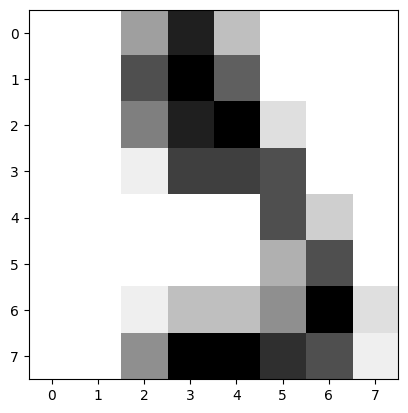

In [17]:
model = AgglomerativeClustering(n_clusters=9, linkage='ward')
cb = model.fit_predict(x)
for k in range(10):
    random_index += 1   
    print("target: ", digits.target[random_index])
    print("k-means predicted target: ", cb[random_index])
    plt.imshow(digits.images[random_index], cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

### Dimensionality Reduction

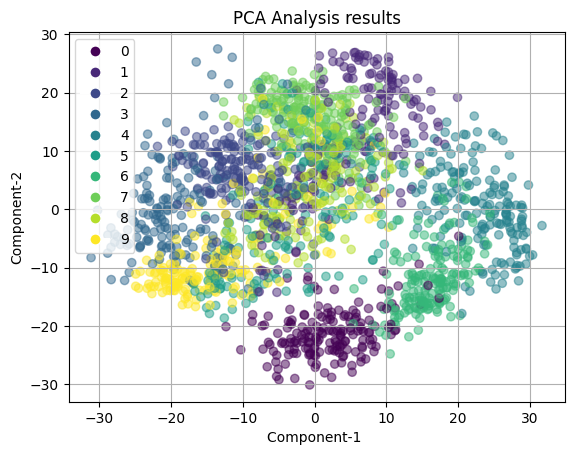

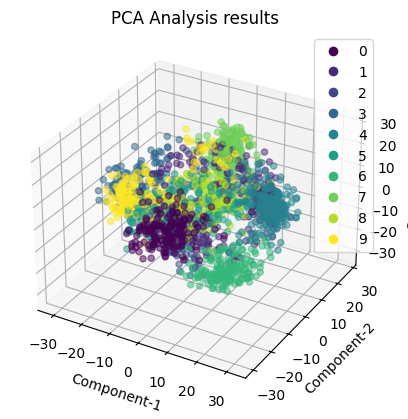

In [22]:
#PCA
from sklearn.decomposition import PCA
x = digits.data
df_y = digits.target
def plot_2D(X,color_vector, method):
    fig, ax = plt.subplots()
    scatter = ax.scatter(X[:,0], X[:,1],c=color_vector, alpha=0.5) #, c=y
    ax.set(xlabel='Component-1 ', ylabel='Component-2',
    title=f'{method} Analysis results')
    ax.grid()
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                  markerfacecolor=scatter.cmap(scatter.norm(label)),
                                  markersize=8, label=str(label)) for label in np.unique(color_vector)]
    ax.legend(handles=legend_elements)
    plt.show()
def plot_3D(X, color_vector, method):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color_vector, alpha=0.5)
    ax.set(xlabel='Component-1', ylabel='Component-2', zlabel='Component-3',
           title= f'{method} Analysis results')
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                  markerfacecolor=scatter.cmap(scatter.norm(label)),
                                  markersize=8, label=str(label)) for label in np.unique(color_vector)]
    ax.legend(handles=legend_elements)
    plt.show()
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
plot_2D(X_pca,df_y, "PCA")
pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)
plot_3D(X_pca,df_y, "PCA")

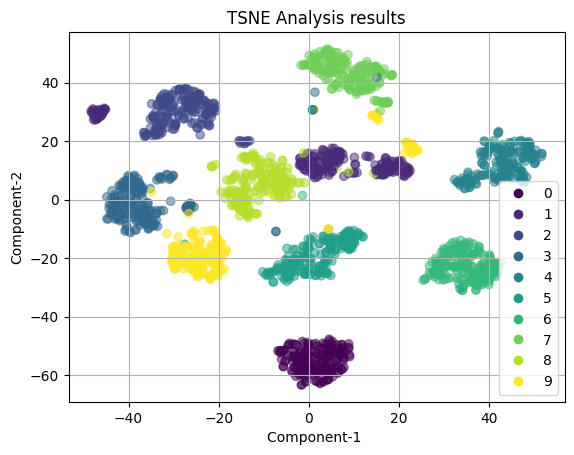

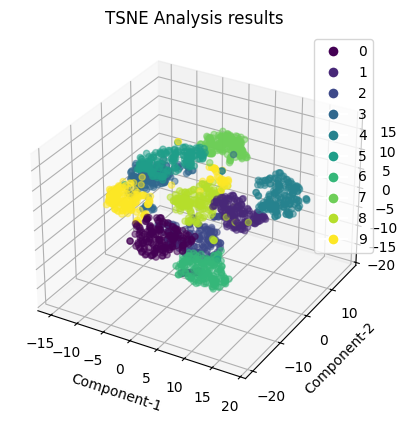

In [23]:
#t-SNE
x = digits.data
df_y = digits.target
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(x)
plot_2D(X_tsne,df_y, "TSNE")
tsne = TSNE(n_components=3)
X_tsne = tsne.fit_transform(x)
plot_3D(X_tsne,df_y, "TSNE")

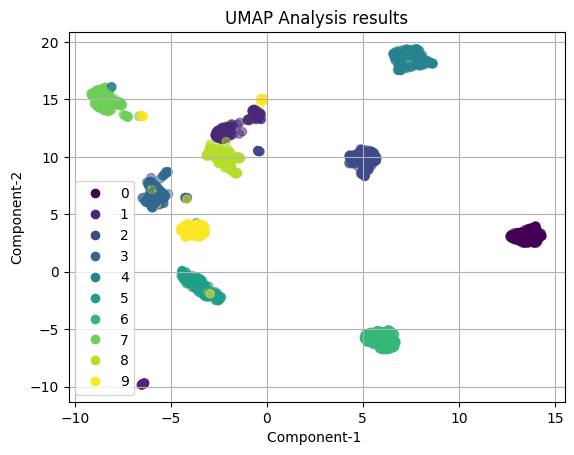

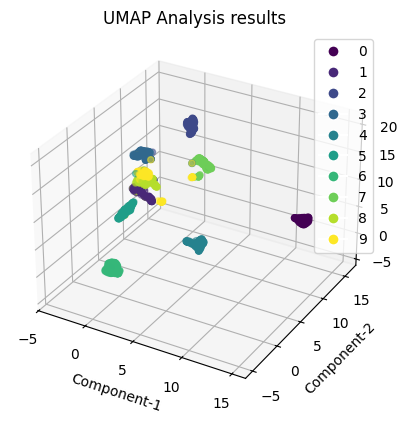

In [27]:
#UMAP
import umap
x = digits.data
df_y = digits.target
umap_1 = umap.UMAP(n_components=2)
X_umap = umap_1.fit_transform(x)
plot_2D(X_umap,df_y, "UMAP")
umap_1 = umap.UMAP(n_components=3)
X_umap = umap_1.fit_transform(x)
plot_3D(X_umap,df_y, "UMAP")
